# Data Engineering Take-Home Assignment: Nature Conservation & Geospatial Data

## Context
Assume you have been hired as a Data Engineer for an organization focused on nature conservation. The organization is working on a project to monitor and protect natural habitats using satellite data, wildlife sensor data, and geospatial information. Your task is to design and implement a data pipeline that ingests, processes, and analyzes this data to help identify areas needing immediate conservation attention as well as build a model that provides helpful insights related our organization's interests.

## Objective 

Your goal in this assessment is to showcase your curiousity and creativity to design rigorous models and derive interesting insights.  

You'll be given two tasks.

The first is a design task, in which we expect you to diagram and describe how you'd set up a process to injest this data from a live streamed source, assuming you are also paying montoring services to supply this data from scratch. Think about how you might transform and store the data efficiently for querying and analysis and feed it into your model. 

The second task will require you devise interesting questions from preliminary explorations of a subset of migration data, found alongside this notebook, and construct a rigorous model to answer them. Please demonstrate all of your process using this notebook, and most importantly your outputs. 




## Tasks

### 1) Design - Data Ingestion & Storage:
- **Ingestion**: Design and implement a solution to ingest data from three different sources: GeoJSON, CSV, and JSON.
- **Automation**: Ensure the pipeline can handle regular data updates (e.g., daily or hourly).
- **Storage**: Choose appropriate storage solutions for each dataset (e.g., relational database, NoSQL, cloud storage, or data lake). Provide justification for your choices.

### 2) Data Transformation & Analysis:
- **Data Parsing & Cleaning**: 
  - Parse and clean the wildlife tracking data (CSV) and geospatial data (GeoJSON) to ensure consistency.
  - Ensure the data is ready for analysis by standardizing formats, removing errors, and handling missing values.

- **Exploratory Data Analysis**:
  - Investigate the data to understand key characteristics, distributions, and trends.

- **Behavioral Analysis**:
  - Identify more complex animal behaviors:
    - Determine when animals cross the boundaries of protected areas.
    - Analyze potential factors contributing to these crossings (e.g., time, weather, or environmental changes).
    - Calculate the total number of animal entries and exits from protected areas over time.

- **Advanced Insights**:
  - Identify migration paths or clustering patterns.
  - Build a predictive model to anticipate future animal movements or identify risk zones for endangered species.

### 3) Optional Bonus - Visualization/Reporting:
- Provide interactive visualizations to demonstrate your analysis, ideally within this notebook.

### Here are data sources you can use to build your analysis. 

- https://storage.googleapis.com/data-science-assessment/animal_events.csv
- https://storage.googleapis.com/data-science-assessment/animals.csv
- https://storage.googleapis.com/data-science-assessment/protected_areas.json
- https://storage.googleapis.com/data-science-assessment/satellites.json

## Deliverables
#### Design component:
- A clear description and diagrams for the architecture and tools you might used, including any cloud services, databases, or libraries (if applicable). During the discussion we'll go over different scenarios. 

#### Implementation:
- Code for the data pipeline that includes:
  - Data ingestion scripts or setup.
  - Transformation and processing logic.
  - Queries or outputs showcasing the results.
- (Optional) a visualization of the results.

## Data
### 1. **Animal Events - CSV** [Download link](https://storage.googleapis.com/data-science-assessment/animal_events.csv)

- Contains data on animal movement events with details like location and speed.
- **Key Columns**: `event_id`, `animal_id`, `timestamp`, `latitude`, `longitude`, `speed`.

---

### 2. **Animals - CSV** [Download link](https://storage.googleapis.com/data-science-assessment/animals.csv)

- Metadata about tracked animals, including species and conservation status.
- **Key Columns**: `animal_id`, `species`, `endangered`, `animal_type`, `preferred_landcover`.

---

### 3. **Protected Areas - GeoJSON** [Download link](https://storage.googleapis.com/data-science-assessment/protected_areas.json)

- Geospatial data representing protected areas with boundaries and metadata.
- **Key Fields**: `name`, `category`, `protected_area_id`, `geometry`.

---

### 4. **Satellite Metadata - JSON** [Download link](https://storage.googleapis.com/data-science-assessment/satellites.json)

- Metadata from satellite imagery, covering factors like cloud cover and resolution.
- **Key Fields**: `satellite_id`, `start_time`, `last_time`, `frequency`, `bounding_box`, `cloud_cover_percentage`, `resolution`.

---

## Evaluation Criteria

- **Data Engineering Skills**: How well the pipeline handles ingestion, transformation, and storage.
- **Geospatial Data Handling**: Ability to process geospatial data and perform spatial operations (e.g., joins, intersections).
- **Scalability & Efficiency**: The pipeline’s ability to handle larger datasets or more frequent updates.
- **Code Quality**: Structure, readability, and use of best practices.
- **Documentation**: Clear explanations of your approach and any assumptions made.
- **Bonus (Visualization/Reporting)**: Extra points for insightful data visualization or reporting.

## Set up

Feel free to set up this notebook using condo, or your own kernal / virtual environment. To make it easier, you can set up the notebook using this docker with the potentialy libraries you might need. 

#### To start using a prepared Docker image, 
- 1 navigate to this shared folder in your terminal, and then load up docker and run the docker file to pull in needed libraries

```bash
docker build -t geospatial-notebook .
docker run -p 8888:8888 -v $(pwd):/home/nobody/work geospatial-notebook
```


When the container runs, it will display a URL with a token (something like http://127.0.0.1:8888/?token=...). It will probably be something like http://127.0.0.1:8888/tree You can copy this URL into your browser, and you'll open to a Jupyter lab. Your existing notebook will be available inside the container under the work directory.

Anytime you want to work again, just run the following command to start the Docker container and access your notebooks:

```bash
docker run -p 8888:8888 -v $(pwd):/home/nobody/work geospatial-notebook
```

Please be sure your notebook runs by adding the needed dependencies to the requirements doc. I would encourage you to avoid external dependencies, like postgres setup for the implementation of your work so that the notebook work works without significant setup. You can demonstrate your knowledge of various infrastructure in your design submission. 

Critiques of this assignment are also welcomed and will contribute to this score. `


### My answer
## Part 1 design of the database
comments:
1. System Overview
The proposed system will consist of several key components:

  - Data Sources: GeoJSON (spatial data), CSV (tabular data), and JSON (structured data).
  - Data Ingestion Layer: A scalable service that ingests data from various sources.
  - Data Transformation Layer: Processes data to make it suitable for analysis and storage.
  - Data Storage Layer: Stores ingested and transformed data in appropriate storage systems.
  - Data Monitoring and Updating System: Monitors data sources for updates and manages data synchronization.

2. Data Ingestion & Transformation

Ingestion Mechanism:

  - API Gateway: Set up an API Gateway to handle incoming data streams and manage secure access.
  - Streaming Services: Apache Kafka or AWS Kinesis is used to handle streaming data, which can efficiently manage high throughput and real-time data streaming.

Transformation Services:

  - Apache Spark: Apache Spark handles large datasets with complex transformations and aggregations. Its ability to process data in memory dramatically speeds up data processing tasks.
  - Data Quality Checks: Implement data validation layers within Spark jobs to ensure data integrity and accuracy.

3. Storage Solutions

Storage Decision Criteria:
  - Data Access Pattern: How frequently and in what manner the data is accessed.
  - Data Structure: The inherent structure of the data (relational, hierarchical, etc.).
  - Scalability Requirements: Expected data growth over time.
  - Cost Efficiency: Balance between performance and cost.

Storage Types and Justification:

GeoJSON Data: Store in a geospatial database like PostGIS (an extension of PostgreSQL) or MongoDB if unstructured queries are common. Both databases efficiently support spatial data types and queries.
  - Justification: Spatial indexing in these databases allows efficient querying of spatial data.
  - CSV Data: Store in a traditional relational database system like PostgreSQL or a cloud-based SQL service like AWS RDS or Google Cloud SQL.
  - Justification: Relational databases are optimal for structured data with an explicit schema that benefits from ACID transactions.
  - JSON Data: Store in a document-based NoSQL database such as MongoDB or DynamoDB.
  - Justification: These databases are ideal for hierarchical data structures typical in JSON and provide flexible schemas.

4. Automation and Monitoring

  - Data Pipeline Automation
  - Apache Airflow or AWS Step Functions: Used to orchestrate the data ingestion, transformation, and loading workflow. They allow the scheduling and monitoring of data pipeline jobs efficiently.

Monitoring and Updating
  - Change Data Capture (CDC): Implement CDC techniques in source systems to capture changes as they happen.
  - Webhooks and API Polling: Sources that support webhooks can be used to get real-time data updates. For others, implement periodic polling to check for updates.

figures:
![Sample Image](./Flowchart.png)



## Part 2 Data Transformation & Analysis:
- **Data Parsing & Cleaning**: 
  - Parse and clean the wildlife tracking data (CSV) and geospatial data (GeoJSON) to ensure consistency.
  - Ensure the data is ready for analysis by standardizing formats, removing errors, and handling missing values.

In [1]:
# Libraries you may or may not need
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
from shapely.geometry import Point
from datetime import datetime
from sklearn.cluster import KMeans
import numpy as np

### load the needed datapoints


In [2]:
# read the data
animals = pd.read_csv('data/animals.csv')
animal_events = pd.read_csv('data/animal_events.csv')
print(animal_events['timestamp'].dtype)
animal_events['timestamp'] = pd.to_datetime(animal_events['timestamp'], errors='coerce')

object


In [3]:
# read GeoJSON file
protected_areas = gpd.read_file('data/protected_areas.json')
satellites = pd.read_json('data/satellites.json')
satellites['start_time'] = satellites['start_time'].dt.date.astype('datetime64[ns]')
satellites['last_time'] = satellites['last_time'].dt.date.astype('datetime64[ns]')

# fix the error of satellites time
satellites['start_time'] = satellites['start_time'].apply(lambda x: x.replace(year=2024))
satellites['last_time'] = satellites['last_time'].apply(lambda x: x.replace(day=10))


In [4]:
# check for missing values
animals.isnull().sum()

animal_id          0
common_name        0
scientific_name    0
redlist_cat        0
megafauna          0
dtype: int64

In [5]:
animal_events.isnull().sum()

animal_id    0
timestamp    0
latitude     0
longitude    0
dtype: int64

In [6]:
protected_areas.isnull().sum()

name                 0
category             0
protected_area_id    0
geometry             0
dtype: int64

In [7]:
satellites.isnull().sum()

satellite_id              0
start_time                0
last_time                 0
frequency                 0
bounding_box              0
cloud_cover_percentage    0
resolution                0
dtype: int64

In [8]:
# check the consistency between animals and animal_events
animals_id1 = set(animals['animal_id'].unique())
animals_id2 = set(animal_events['animal_id'].unique())
print(animals_id1 == animals_id2)

True


In [9]:
animals['redlist_cat'] = pd.Categorical(animals['redlist_cat'], 
                                        categories=[
                                            "Least Concern", 
                                            "Near Threatened", 
                                            "Vulnerable", 
                                            "Endangered", 
                                            "Critically Endangered"
                                        ], 
                                        ordered=True)

In [10]:
# convert the animal_events into gdf
animal_events['geometry'] = [Point(xy) for xy in zip(animal_events.longitude, animal_events.latitude)]
animal_events_gdf = gpd.GeoDataFrame(animal_events, geometry='geometry')
animal_events_gdf.set_crs(protected_areas.crs, inplace=True)

,animal_id,timestamp,latitude,longitude,geometry
0,A001,2024-09-01 12:00:00,45.2284,-110.7622,POINT (-110.7622 45.2284)
1,A002,2024-09-01 12:00:00,44.5760,-110.6763,POINT (-110.6763 44.576)
2,A003,2024-09-01 12:00:00,44.4232,-111.1061,POINT (-111.1061 44.4232)
3,A004,2024-09-01 12:00:00,37.9058,-119.7857,POINT (-119.7857 37.9058)
4,A005,2024-09-01 12:00:00,37.7896,-119.6426,POINT (-119.6426 37.7896)
5,A006,2024-09-01 12:00:00,37.8829,-119.7608,POINT (-119.7608 37.8829)
6,A007,2024-09-01 12:00:00,36.3720,-113.1627,POINT (-113.1627 36.372)
7,A008,2024-09-01 12:00:00,36.6193,-112.3388,POINT (-112.3388 36.6193)
8,A009,2024-09-01 12:00:00,36.3388,-112.1190,POINT (-112.119 36.3388)
9,A001,2024-09-01 13:00:00,44.3946,-110.8218,POINT (-110.8218 44.3946)


In [11]:
# merge animals and animal_event
animals_full = pd.merge(animals, animal_events_gdf, on='animal_id', how='outer')
animals_full = gpd.GeoDataFrame(animals_full, geometry='geometry')

In [12]:
# convert the satellites into GeoDataframe to make sure the consistency
# deal with geometry data


def parse_boundary(boundary_dict):
    # get xmin, ymin, xmax, ymax from dictionary
    xmin = boundary_dict['xmin']
    xmax = boundary_dict['xmax']
    ymin = boundary_dict['ymin']
    ymax = boundary_dict['ymax']

    # create the boundaries to create the polygon
    return Polygon([(xmin, ymin), (xmin, ymax), (xmax, ymax), (xmax, ymin)])


# convert the satellites into GeoDataframe
satellites['geometry'] = satellites['bounding_box'].apply(parse_boundary)
satellites = satellites.drop(columns=['bounding_box'])
satellites = gpd.GeoDataFrame(satellites, geometry='geometry')


- **Exploratory Data Analysis**:
  - Investigate the data to understand key characteristics, distributions, and trends.

/var/folders/zv/5b8fmg4x3gj91wqjc43ymj340000gn/T/ipykernel_50660/2300718119.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  megafauna_counts = animals.groupby(['redlist_cat', 'megafauna']).size().unstack(fill_value=0)


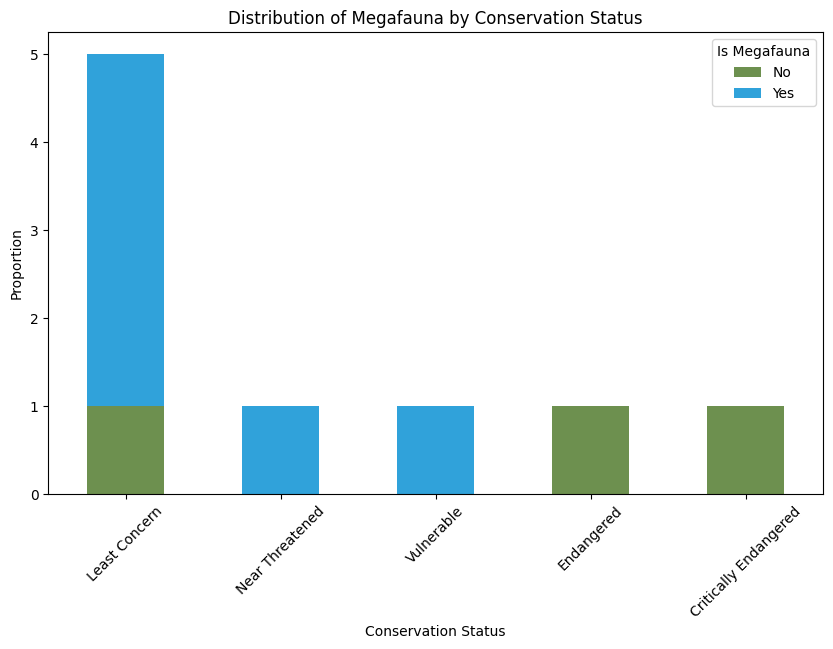

In [13]:
# EDA
# figure1 : distribution of the animals
# calculate the counts of the animals in different categories
megafauna_counts = animals.groupby(['redlist_cat', 'megafauna']).size().unstack(fill_value=0)

# plot the distribution for the animals
megafauna_counts.plot(kind='bar', stacked=True, color=['#6d904f', '#30a2da'], figsize=(10, 6))

plt.title('Distribution of Megafauna by Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Proportion')
plt.legend(title='Is Megafauna', labels=['No', 'Yes'])
plt.xticks(rotation=45)  # rotation to avoid the overlap
plt.show()


From the figures we can observe that most of the animals are least concern. What's more, for the least concern animals, most of them are megafauna.

/var/folders/zv/5b8fmg4x3gj91wqjc43ymj340000gn/T/ipykernel_50660/56855045.py:42: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  handles, labels = axs[-1].get_legend_handles_labels()


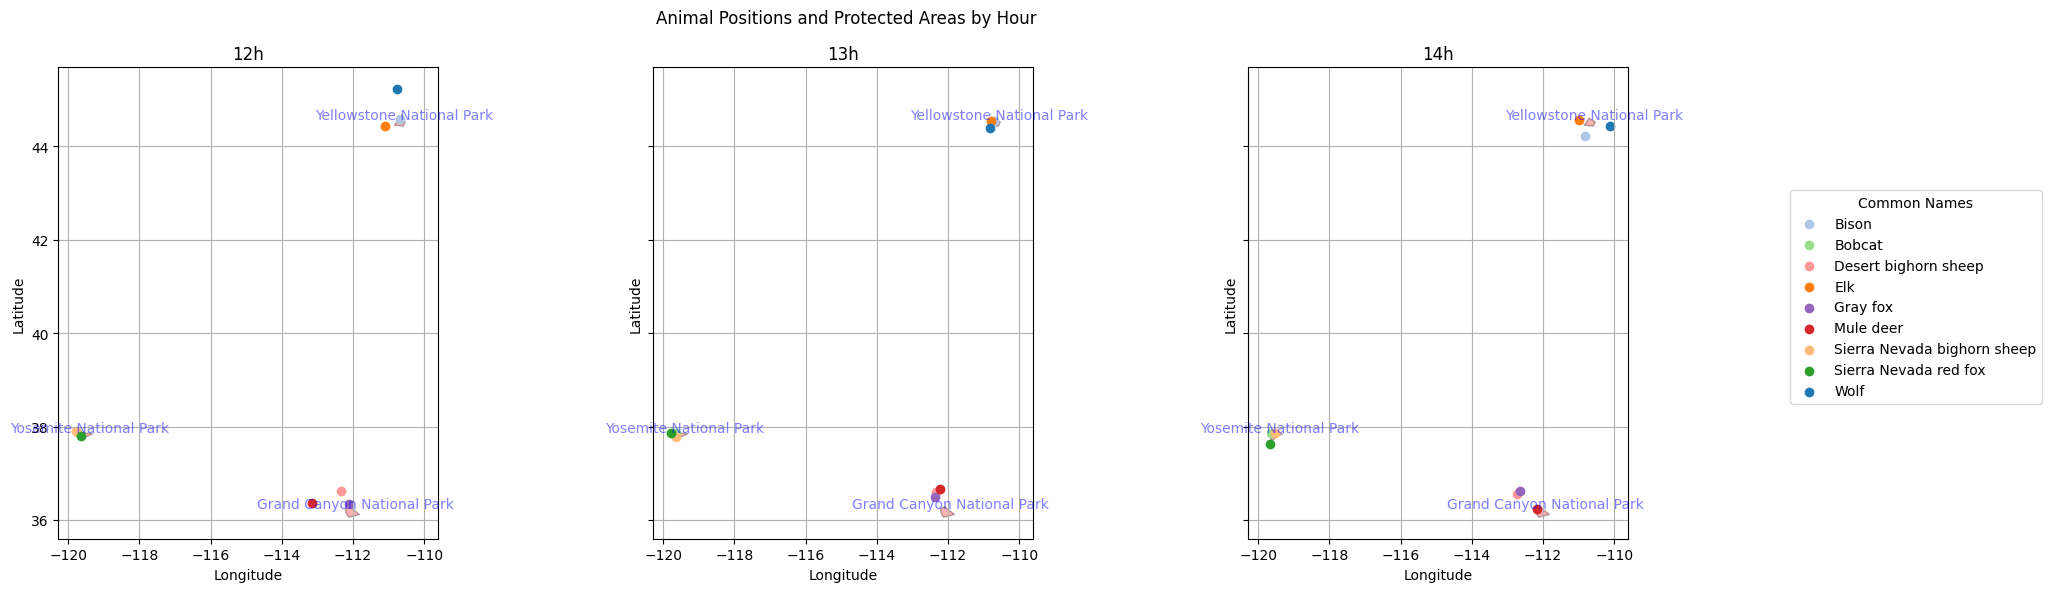

In [14]:
# extract hour informatio
animals_full['hour'] = animals_full['timestamp'].dt.hour

# set the colors
common_name_colors = {name: plt.cm.tab20(i % 20) for i, name in enumerate(animals_full['common_name'].unique())}

# create figures for different hours
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
hours = [12, 13, 14]

# set the title
fig.suptitle('Animal Positions and Protected Areas by Hour')

# plot each hour in a different subplot
for ax, hour in zip(axs, hours):
    # extract data for the specific hour
    hour_data = animals_full[animals_full['hour'] == hour]
    
    # plot protected areas in the background
    protected_areas.plot(ax=ax, color='red', alpha=0.3, edgecolor='black', label='Protected Areas')
    
    # add names of protected areas as labels
    for idx, row in protected_areas.iterrows():
        # calculate the centroid of each polygon
        centroid = row['geometry'].centroid
        # place a label at the centroid coordinates
        ax.annotate(text=row['name'], xy=(centroid.x, centroid.y), xytext=(3, 3),
                    textcoords="offset points", ha='center', fontsize=10, color='blue', alpha = 0.5)

    # scatter plot for each animal
    for name, group in hour_data.groupby('common_name'):
        # Extract coordinates from the geometry column
        lon, lat = zip(*[(geom.x, geom.y) for geom in group.geometry])
        ax.scatter(lon, lat, color=common_name_colors[name], label=name)
    
    ax.set_title(f'{hour}h')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.grid(True)

# set the position of labels
handles, labels = axs[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.02, 0.5), title='Common Names')

# adjust the layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 1])

plt.show()


From the plot, we can identify the areas where the animals typically reside. Additionally, it reveals that certain species have overlapping habitats; for instance, the bobcat, Sierra Nevada red fox, and Sierra Nevada bighorn sheep share proximate regions, as do the desert bighorn sheep, wolf, and bison.

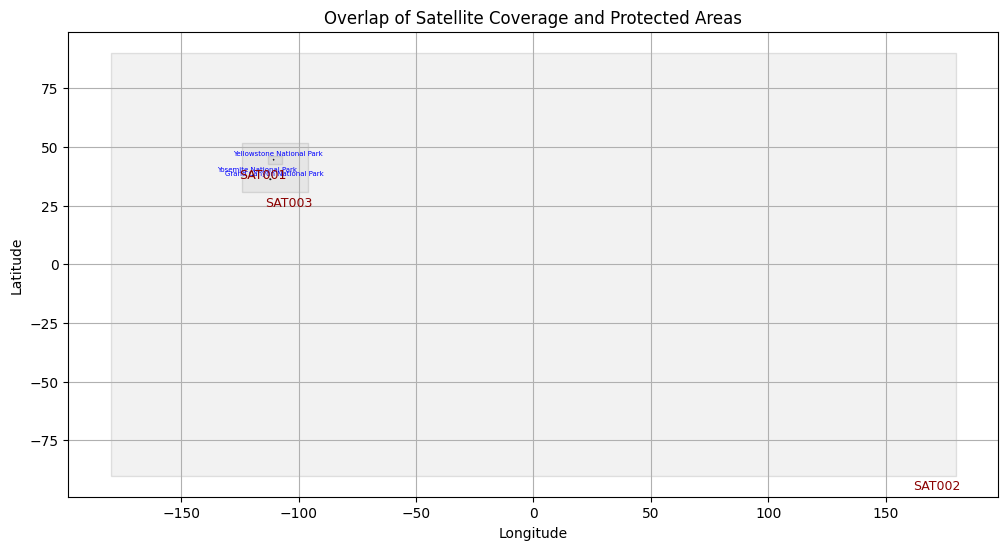

In [15]:
# figure3: region for the protected_areas and the satellites boundaries
# set the figure size
fig, ax = plt.subplots(figsize=(12, 8)) 

# plot protected_areas
protected_areas.plot(ax=ax, color='red', alpha=1, edgecolor='k', label='Protected Areas')

# plot satellite coverage areas
satellites.plot(ax=ax, color='grey', alpha=0.1, edgecolor='k', label='Satellite Coverage Areas')

# add labels to all protected_areas
for idx, row in protected_areas.iterrows():
    centroid = row['geometry'].centroid
    ax.annotate(text=row['name'], xy=(centroid.x, centroid.y), xytext=(3, 3),
                textcoords="offset points", ha='center', fontsize=5, color='blue')
    
# add labels to all satellite
for idx, row in satellites.iterrows():
    minx, miny, maxx, maxy = row['geometry'].bounds
    # position the label at the bottom right corner
    label_position = (maxx, miny)
    # set the label
    ax.annotate(text=row['satellite_id'], xy=label_position, xytext=(3, -10),
                textcoords="offset points", ha='right', fontsize=9, color='darkred')


# set the title
plt.title('Overlap of Satellite Coverage and Protected Areas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
ax.grid(True)

plt.show()


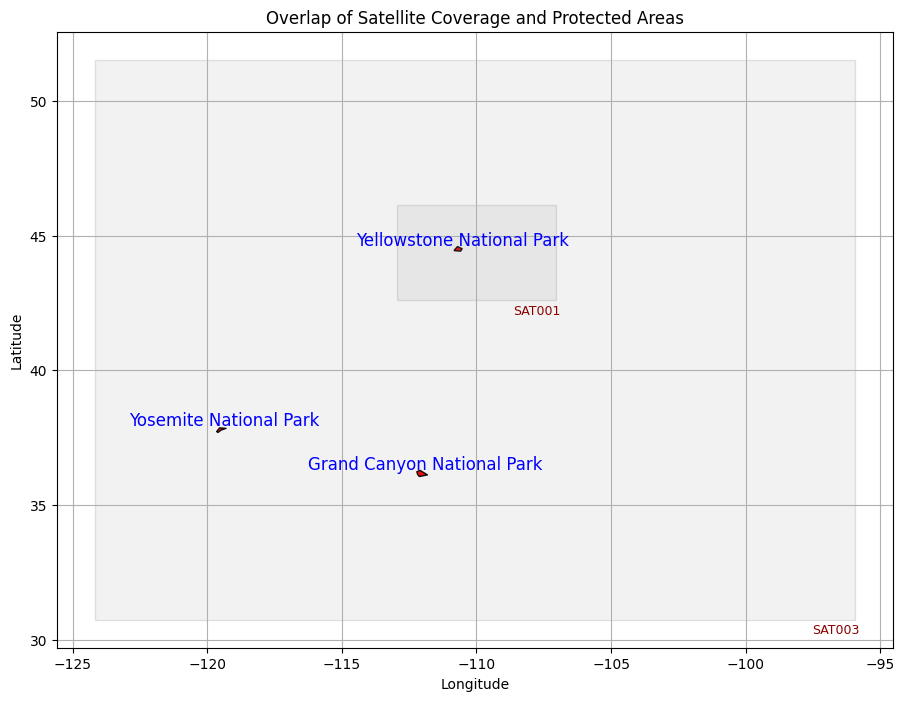

In [16]:
# set the figure size
fig, ax = plt.subplots(figsize=(12, 8))

# plot the protected areas
protected_areas.plot(ax=ax, color='red', alpha=1, edgecolor='k', label='Protected Areas')

# plot satellite coverage areas
satellites.iloc[[0, 2]].plot(ax=ax, color='grey', alpha=0.1, edgecolor='k', label='Satellite Coverage Areas')

# add labels to all protected_areas
for idx, row in protected_areas.iterrows():
    centroid = row['geometry'].centroid
    ax.annotate(text=row['name'], xy=(centroid.x, centroid.y), xytext=(3, 3),
                textcoords="offset points", ha='center', fontsize=12, color='blue')

# Loop through each satellite coverage to add labels
for idx, row in satellites.iterrows():
    minx, miny, maxx, maxy = row['geometry'].bounds
    # position the label at the bottom right corner
    label_position = (maxx, miny)
    # set the label
    ax.annotate(text=row['satellite_id'], xy=label_position, xytext=(3, -10),
                textcoords="offset points", ha='right', fontsize=9, color='darkred')

# set the title
plt.title('Overlap of Satellite Coverage and Protected Areas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
ax.grid(True)

plt.show()

In this plot, we can observe that Yellowstone is located precisely within the coverage of the smallest satellite (SAT001), while the other two national parks, Yosemite National Park and Grand Canyon National Park, are outside of SAT001 but within SAT003.

- **Behavioral Analysis**:
  - Identify more complex animal behaviors:
    - Determine when animals cross the boundaries of protected areas.
    - Analyze potential factors contributing to these crossings (e.g., time, weather, or environmental changes).
    - Calculate the total number of animal entries and exits from protected areas over time.


In [17]:
crossings = gpd.sjoin(animals_full, protected_areas, how="inner", predicate='intersects')
print(crossings)

   animal_id                  common_name          scientific_name  \
3       A002                        Bison              Bison bison   
4       A002                        Bison              Bison bison   
11      A004  Sierra Nevada bighorn sheep  Ovis canadensis sierrae   
20      A007                    Mule deer      Odocoileus hemionus   

      redlist_cat megafauna           timestamp  latitude  longitude  \
3      Vulnerable       yes 2024-09-01 12:00:00   44.5760  -110.6763   
4      Vulnerable       yes 2024-09-01 13:00:00   44.5361  -110.7078   
11     Endangered        no 2024-09-01 14:00:00   37.8601  -119.5353   
20  Least Concern       yes 2024-09-01 14:00:00   36.2261  -112.1831   

                     geometry  hour  index_right                        name  \
3    POINT (-110.6763 44.576)    12            0   Yellowstone National Park   
4   POINT (-110.7078 44.5361)    13            0   Yellowstone National Park   
11  POINT (-119.5353 37.8601)    14            1

From the results of the crossings analysis, we can observe that the three protected animals, A002, A004, and A007, have either entered or left the protected area.

In [18]:
# sort the data by animal ID and timestamp
animals_full = animals_full.sort_values(by=['animal_id', 'timestamp'])

# shift the previous geometry to calculate entries and exits
animals_full['prev_geometry'] = animals_full.groupby('animal_id')['geometry'].shift(1)

# function to detect entries and exits into protected areas
def detect_crossing(row, protected_areas):
    if row['prev_geometry'] is None:
        return None  # No previous point to compare
    prev_point = gpd.GeoDataFrame(index=[0], geometry=[row['prev_geometry']], crs=protected_areas.crs)
    current_point = gpd.GeoDataFrame(index=[0], geometry=[row['geometry']], crs=protected_areas.crs)
    prev_within = not gpd.sjoin(prev_point, protected_areas, how="inner", predicate='intersects').empty
    curr_within = not gpd.sjoin(current_point, protected_areas, how="inner", predicate='intersects').empty
    
    if prev_within and not curr_within:
        return 'exit'
    elif not prev_within and curr_within:
        return 'entry'
    return None

animals_full['crossing_type'] = animals_full.apply(detect_crossing, axis=1, protected_areas=protected_areas)


In [19]:
# calculate total number of entries and exits
crossing_counts = animals_full[animals_full['crossing_type'].notna()].groupby(['crossing_type']).size().reset_index(name='count')

print(crossing_counts)

  crossing_type  count
0         entry      2
1          exit      1


- **Advanced Insights**:
  - Identify migration paths or clustering patterns.
  - Build a predictive model to anticipate future animal movements or identify risk zones for endangered species.

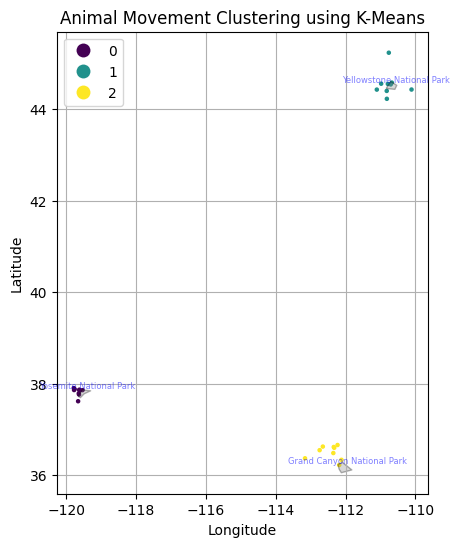

In [20]:
# get the coordinates
coords = animals_full[['longitude', 'latitude']]

# define the number of clusters
k = 3 

kmeans = KMeans(n_clusters=k, random_state=0)

# fit the model
animals_full['cluster'] = kmeans.fit_predict(coords)

# plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
animals_full.plot(column='cluster', ax=ax, categorical=True, legend=True, markersize=5, cmap='viridis')

# plot protected areas in the background
protected_areas.plot(ax=ax, color='grey', alpha=0.3, edgecolor='black', label='Protected Areas')
# add labels to all protected_areas
for idx, row in protected_areas.iterrows():
    centroid = row['geometry'].centroid
    ax.annotate(text=row['name'], xy=(centroid.x, centroid.y), xytext=(3, 3),
                textcoords="offset points", ha='center', fontsize=6, alpha = 0.5, color='blue')
    
plt.title('Animal Movement Clustering using K-Means')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


The results are obvious as these animals are each distributed within three different conservation areas. However, the findings become more meaningful when we increase the number of clusters in the K-means clustering.

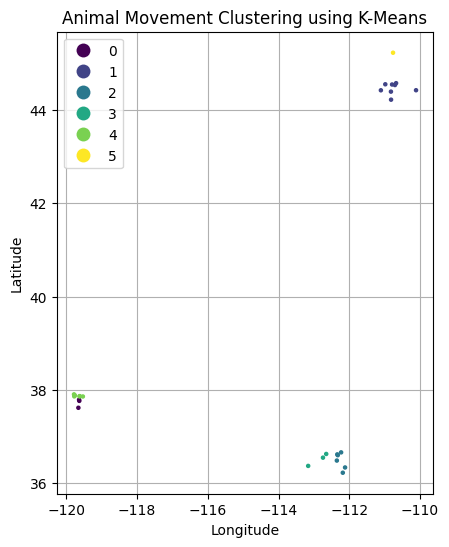

In [21]:
# get the coordinates
coords = animals_full[['longitude', 'latitude']]

# define the number of clusters
k = 6

kmeans = KMeans(n_clusters=k, random_state=0)

# fit the model
animals_full['cluster'] = kmeans.fit_predict(coords)

# plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
animals_full.plot(column='cluster', ax=ax, categorical=True, legend=True, markersize=5, cmap='viridis')
plt.title('Animal Movement Clustering using K-Means')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


As shown in the top right cluster of the plot, one point is so distant from the others that it forms its own cluster. This is a wolf (A001). Excluding this protected animal, the other animals within the same protected area still belong to the same cluster. Additionally, it is an interesting observation that the points in the bottom left cluster do not belong to the same animal or even the same time period.

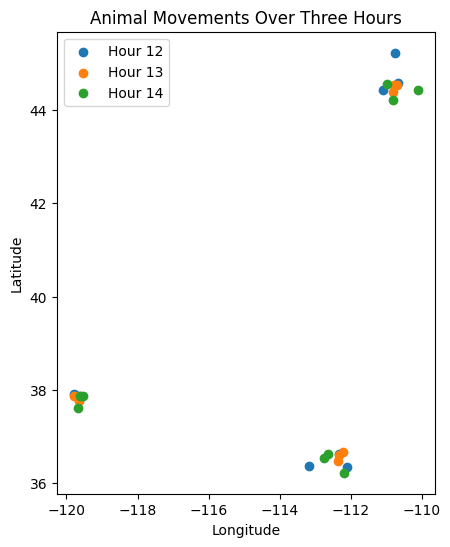

In [22]:
# plot movements by hour
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for hour, group in animals_full.groupby('hour'):
    group.plot(ax=ax, marker='o', label=f'Hour {hour}')
ax.legend()
plt.title('Animal Movements Over Three Hours')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

This time-based plot reveals that animals exhibit a tendency to backtrack over time. This behavior might be associated with climatic conditions; for instance, during hotter weather, animals might prefer areas with less/more sunlight. It could also be related to meteorological changes, such as rainfall.

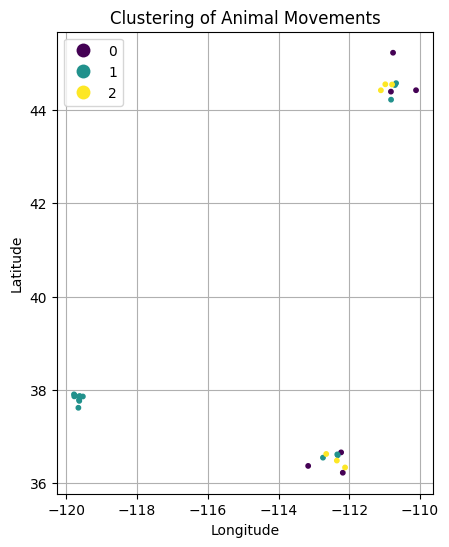

In [23]:
# calculate movement distances and directions
animals_full = animals_full.sort_values(by=['animal_id', 'timestamp'])
animals_full['shifted_geometry'] = animals_full.groupby('animal_id')['geometry'].shift(-1)
animals_full['distance'] = animals_full.apply(lambda row: row['geometry'].distance(row['shifted_geometry']) if pd.notnull(row['shifted_geometry']) else 0, axis=1)

# Assuming the interest is in clustering animals based on their total movement
animals_full['total_distance'] = animals_full.groupby('animal_id')['distance'].transform('sum')

# Apply clustering on movement metrics
kmeans = KMeans(n_clusters=3)  # Adjust clusters according to data and needs
cluster_labels = kmeans.fit_predict(animals_full[['total_distance']])

# Add cluster labels to the GeoDataFrame
animals_full['cluster'] = cluster_labels

# Plotting the clusters
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
animals_full.plot(column='cluster', ax=ax, categorical=True, legend=True, markersize=10, cmap='viridis')
plt.title('Clustering of Animal Movements')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()